In [366]:
import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

Let's create a vector containing the price for placing a bid at each node of an auction lot.

In [367]:
pricing = np.arange(1, 101)
pricing

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

We will use it in conjunction with a player's strategy to determine a player's next bids. A strategy is a vector of 0s and 1s that determins the next desired bid positions for a player.

In [396]:
strategy = np.zeros(100, dtype=int)
strategy[0] = 1 # player would like to bid to node 0 [price = 1]

# player would like to bid
# until node 50 [price = 51],
# incrementing each time by 10
strategy[0:51:10] = 1

strategy[-1] = 1 # player would like to bid to node 99 [price = 100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

By multiplying the strategy and pricing vectors we can extract the nodes that the user would like to end at. We can also remove all zero-elements

In [369]:
bids = strategy * pricing
bids = bids[bids > 0]
strategy, bids

array([  1,  11,  21,  31,  41,  51, 100])

In [370]:
def strategy_to_bids(strategy):
  bids = strategy * pricing
  bids = bids[bids > 0]

  return bids

def bids_to_strategy(bids):
  strategy = np.zeros(100, dtype=int)
  strategy[bids - 1] = 1

  return strategy

In [371]:
current_bid = 100

# return next_bid in the sequence, 
# if none is found return 404
next_bid = np.min(bids[bids > current_bid], initial=404)

next_bid

404

In [372]:
class Player:
  def __init__(self, id, strategy, balance):
    self.id = id
    self.balance = balance
    self.strategy = strategy
    self.bids = strategy * pricing
    self.bids = self.bids[self.bids > 0]

  def get_next_bid(self, lot):
    # Don't bid agains yourself
    if lot.current_bid_owner is not None and self.id == lot.current_bid_owner.id:
      return None

    bids = self.bids

    next_bid = np.min(
      bids[bids > lot.current_bid],
      initial=404
    )

    # Ceiling reached
    if next_bid == 404:
      return None
    
    # Not enough in balance to cover
    if self.balance < next_bid:
      return None
    
    return next_bid

In [373]:
class HundredVoteLot:
  current_bid = 0
  current_bid_owner: Player = None

  def __init__(self, players: list[Player]):
    self.players = random.sample(players, len(players))

  def run(self):
    self.history = []

    abstain_counter = 0

    while abstain_counter < len(self.players):
      for player in self.players:
        next_bid = player.get_next_bid(self)

        if next_bid is None:
          abstain_counter += 1
        else:
          self.current_bid = next_bid
          self.current_bid_owner = player

          player.balance -= next_bid
        
        self.history.append((player.id, next_bid))
    
    if self.current_bid_owner is not None:
      self.current_bid_owner.balance += 100

In [374]:
example_strategy = np.zeros(100)
# Start at 1, increment by 10, until 51
# 1, 11, 21, 31, 41, 51
example_strategy[:50:10] = 1

example_strategy * pricing

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [375]:
players = [
  Player("Alice", strategy, balance=1000),
  Player("Bob", strategy, balance=1000),
]

lot = HundredVoteLot(players)
lot.run()

print(f"{len(players)} players bid on a 100 vote lot...")
print(f"History: {lot.history}")

for player in players:
  print(f"{player.id} - {player.balance} votes")

2 players bid on a 100 vote lot...
History: [('Bob', 1), ('Alice', 11), ('Bob', 21), ('Alice', 31), ('Bob', 41), ('Alice', 51), ('Bob', 100), ('Alice', None), ('Bob', None), ('Alice', None)]
Alice - 907 votes
Bob - 937 votes


In [376]:
class HundredVoteAuction:
  def __init__(self, players: list[Player], rounds: int):
    self.players = players
    self.rounds = rounds
    self.history = []
    self.balances = np.zeros((len(players), rounds + 1))

  def run(self):
    self.balances[:, 0] = [player.balance for player in players]

    for round in range(1, self.rounds + 1):
      lot = HundredVoteLot(self.players)
      lot.run()

      self.history.append(lot.history)

      for i, player in enumerate(self.players):
        self.balances[i][round] = player.balance

  def plot(self):
    for i, player in enumerate(self.players):
      plt.plot(self.balances[i], label=f'{player.id}')
    
    plt.xlabel('Game #')
    plt.ylabel('Player\'s Balance')
    plt.legend()
    plt.show()

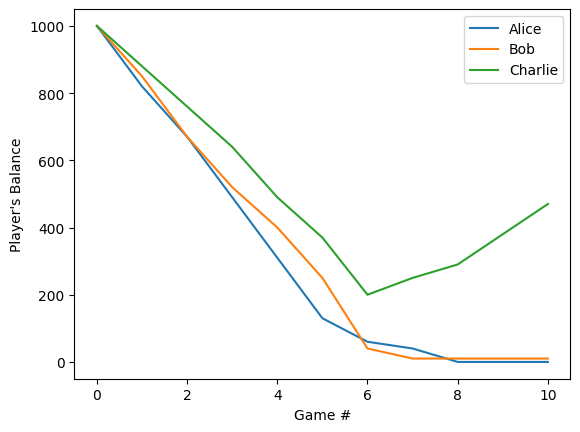

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  40.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  60.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  70.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       100.])

In [377]:
# Start at 10 (9+1),
# incrementing by 10 each time
# until the end (100)
example_strategy= np.zeros(100)
example_strategy[9::10] = 1

players = [
  Player("Alice", example_strategy, balance=1000),
  Player("Bob", example_strategy, balance=1000),
  Player("Charlie", example_strategy, balance=1000),
]

auction = HundredVoteAuction(players, rounds=10)
auction.run()
auction.plot()

example_strategy * pricing

Let's run a couple of simulation to determine what type of strategy get's ahead, by changing only one variable at a time (balance, ceiling, increment)

### Increment

Assumption - if all players have the same ceiling, then the player with the least steps to get to that ceiling has an advantage. This would be the player with the highest increment. This comes from the design of the game which requires each placed bid to be payed immediately. Larger increments get you to that target ceiling with lower investments.

In [378]:
CEILING = 80

increment_10 = np.zeros(100)
increment_10[0] = 1
increment_10[9:CEILING:10] = 1

increment_20 = np.zeros(100)
increment_20[0] = 1
increment_20[19:CEILING:20] = 1

increment_30 = np.zeros(100)
increment_30[0] = 1
increment_30[29:CEILING:30] = 1

np.array([increment_10, increment_20, increment_30]) * pricing

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

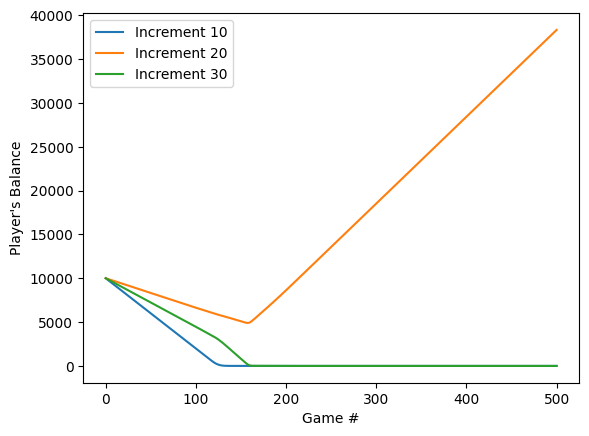

In [379]:
SIMULATIONS = 1000
ROUNDS_PER_AUCTION = 500

data = np.zeros((SIMULATIONS, 3, ROUNDS_PER_AUCTION + 1))

for i in range(SIMULATIONS):
  players = [
    Player("Increment 10", increment_10, balance=10000),
    Player("Increment 20", increment_20, balance=10000),
    Player("Increment 30", increment_30, balance=10000),
  ]

  auction = HundredVoteAuction(players, rounds=ROUNDS_PER_AUCTION)
  auction.run()

  data[i] = auction.balances

averages = np.zeros((4, ROUNDS_PER_AUCTION + 1))
averages = np.mean(data, axis=0)

auction = HundredVoteAuction(players, rounds=ROUNDS_PER_AUCTION)
auction.balances = averages
auction.plot()

### Ceiling

In [380]:
ceiling_10 = np.zeros(100)
ceiling_10[9:10:] = 1

ceiling_50 = np.zeros(100)
ceiling_50[49:50:] = 1

ceiling_99 = np.zeros(100)
ceiling_99[99:100:] = 1

ceiling_10 * pricing, ceiling_50 * pricing, ceiling_99 * pricing

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

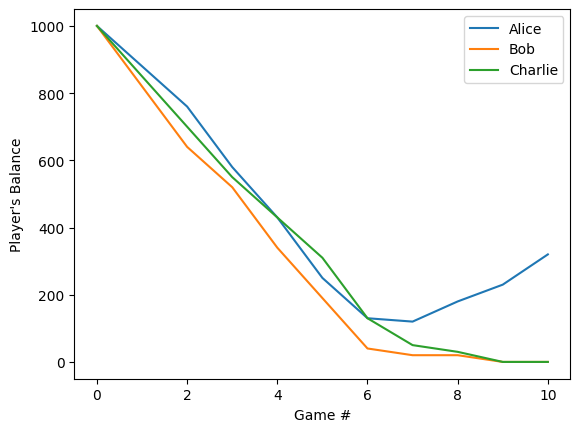

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  21,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  31,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 100])

In [381]:
example_strategy= np.zeros(100)
example_strategy[9::10] = 1

players = [
  Player("Alice", example_strategy, balance=1000),
  Player("Bob", example_strategy, balance=1000),
  Player("Charlie", example_strategy, balance=1000),
]

auction = HundredVoteAuction(players, rounds=10)
auction.run()
auction.plot()

strategy * pricing

In [382]:
ceiling_10 = np.zeros(100)
ceiling_10[9:10:] = 1

ceiling_50 = np.zeros(100)
ceiling_50[49:50:] = 1

ceiling_99 = np.zeros(100)
ceiling_99[99:100:] = 1

ceiling_10 * pricing, ceiling_50 * pricing, ceiling_99 * pricing

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [383]:
def strategy_to_bids(strategy):
  bids = strategy * pricing
  bids = bids[bids > 0]

  return bids

def bids_to_strategy(bids):
  strategy = np.zeros(100, dtype=int)
  strategy[bids - 1] = 1

  return strategy

In [394]:
S00 = np.zeros(100).astype(int)

S0 = np.zeros(100).astype(int)
S0[0] = 1
S0[-1] = 1

S1 = np.zeros(100).astype(int)
S1[0] = 1
S1[9::10] = 1

S2 = np.zeros(100).astype(int)
S2[0] = 1
S2[24::25] = 1

S3 = np.zeros(100).astype(int)
S3[0] = 1
S3[32::33] = 1

In [385]:
bids = strategy_to_bids(S1)
strategy = bids_to_strategy(bids)

In [395]:
BATTLES = 100
ROUNDS_PER_BATTLE = 100
STARTING_BALANCE = 1000

strategies = [
  S0,
  S1, S1, S1, S1, S1,
  S2, S2, S2, S2, S2,
  S3, S3, S3, S3, S3,
]


strategies = [
  S00, S00, S00, S00,
  S0, S0, S0, S0, S0,
]

for _ in range(BATTLES):
  battle = random.sample(list(enumerate(strategies)), 2)

  players = [
    Player(f"Strategy {battle[0][0]}", battle[0][1], balance=STARTING_BALANCE),
    Player(f"Strategy {battle[1][0]}", battle[1][1], balance=STARTING_BALANCE),
  ]

  auction = HundredVoteAuction(
    players=players,
    rounds=ROUNDS_PER_BATTLE
  )
  auction.run()

  if players[0].balance > players[1].balance:
    strategies[battle[1][0]] = battle[0][1]
  else:
    strategies[battle[0][0]] = battle[1][1]

print(f"Remaining strategies:")
for i, strategy in enumerate(strategies):
  print(f"Strategy {i}: {strategy_to_bids(strategy)}")

Remaining strategies:
Strategy 0: [  1 100]
Strategy 1: [  1 100]
Strategy 2: [  1 100]
Strategy 3: [  1 100]
Strategy 4: [  1 100]
Strategy 5: [  1 100]
Strategy 6: [  1 100]
Strategy 7: [  1 100]
Strategy 8: [  1 100]


In [387]:
battle_strategies = [S1, S2, S3]

def fitness(player_strategy):
  for opponent_strategy in battle_strategies:
    print(f"Player: {player_strategy}")
    print(f"Opponent: {opponent_strategy}")

    players = [
      Player("Strategy", player_strategy, balance=1000),
      Player("Opponent", opponent_strategy, balance=1000),
    ]

    auction = HundredVoteAuction(players, rounds=100)
    auction.run()

yumeko = np.zeros(100)
yumeko[0] = 1
yumeko[-1] = 1

fitness(yumeko)

Player: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]
Opponent: [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
Player: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]
Opponent: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 